In [1]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import networkx as nx
import math
import bezier

In [8]:
# voronoi diagram

num_points = 5
random.seed(98)
x = [random.uniform(-4.5,4.5) for _ in range(num_points)]
y = [random.uniform(-3,3) for _ in range(num_points)]
print('position', np.array([x, y]).T)

x_edge = [-4.5,-4.5,-4.5,-2.25,0,2.25,4.5,4.5,4.5,2.25,0,-2.25]
y_edge = [-3,0,3,3,3,3,3,0,-3,-3,-3,-3]

start_point = [-4,-2.5]
goal_point = [3.5,1]

coordinates_x = [start_point[0]]+x+x_edge+[goal_point[0]]
coordinates_y = [start_point[1]]+y+y_edge+[goal_point[1]]
coordinates = np.array([coordinates_x, coordinates_y]).T

vor = Voronoi(coordinates)
print(vor.point_region)

position [[-1.29241614  1.3690883 ]
 [ 2.9804425   1.07093948]
 [-1.32859218 -2.61207954]
 [-3.97147668 -0.01789892]
 [-0.24002523 -1.82445049]]
[ 3 19  7 14 18 17  6  1  2  4 11  8  9 13  5 12 16 15 10]


In [3]:
# astar path finding

def heuristic(coord1, coord2):
    x1, y1 = coord1
    x2, y2 = coord2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def point_inside_field(point, width=9, height=6):
    x, y = point
    return (-width/2 <= x <= width/2) and (-height/2 <= y <= height/2)

# Create a graph
graph = nx.Graph()
for a, b in vor.ridge_vertices:
    if -1 not in (a, b) and point_inside_field(vor.vertices[a]) and point_inside_field(vor.vertices[b]):
        graph.add_edge(a, b, weight=heuristic(vor.vertices[a], vor.vertices[b]))

region_index = vor.point_region[np.argmin(np.linalg.norm(np.array(coordinates) - np.array(start_point), axis=1))]
region_vertices = vor.regions[region_index]
for item in region_vertices:
    if item != -1:
        graph.add_edge('start', item, weight=heuristic(start_point, vor.vertices[item]))

region_index = vor.point_region[np.argmin(np.linalg.norm(np.array(coordinates) - np.array(goal_point), axis=1))]
region_vertices = vor.regions[region_index]
for item in region_vertices:
    if item != -1:
        graph.add_edge('goal', item, weight=heuristic(goal_point, vor.vertices[item]))

path = nx.astar_path(graph, 'start', 'goal')
print(path)

['start', 5, 21, 23, 22, 15, 16, 18, 17, 'goal']


In [4]:
# bezier curve

x_path = []
y_path = []
for index in range(len(path)):
    if path[index] == 'start':
        point = vor.points[0]
    elif path[index] == 'goal':
        point = vor.points[-1]
    else:
        point = vor.vertices[path[index]]
    x_path.append(point[0])
    y_path.append(point[1])

nodes = np.asfortranarray([x_path, y_path])
curve = bezier.Curve(nodes, len(x_path)-1)
print(curve)

<Curve (degree=9, dimension=2)>


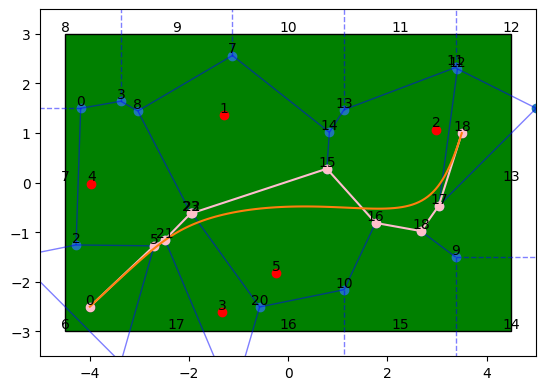

In [7]:
# draw plot

fig, ax = plt.subplots()
rect = patches.Rectangle((-4.5,-3), 9, 6, linewidth=1, edgecolor='black', facecolor='green')
ax.add_patch(rect)

plt.scatter(x, y, color='red', marker='o')
plt.scatter(
  [start_point[0], goal_point[0]],
  [start_point[1], goal_point[1]],
  color='black',
  marker='o'
)

voronoi_plot_2d(vor, ax=ax, show_points=False, line_colors='blue', line_alpha=0.5)

index = 0
for i, j in vor.vertices:
    if point_inside_field((i, j)):
      plt.text(i, j, str(index), ha='center', va='bottom')
    index += 1

index = 0
for i, j in coordinates:
    if point_inside_field((i, j)):
      plt.text(i, j, str(index), ha='center', va='bottom')
    index += 1

# draw path
plt.plot(x_path, y_path, marker='o', color='pink')
curve.plot(100, ax=ax)

ax.set_aspect('equal')
ax.set_xlim(-5, 5)
ax.set_ylim(-3.5, 3.5)

plt.show()